In [2]:
import pandas as pd

# Task 1

In [3]:
# Load the dataset
df = pd.read_csv('messed_dataset.csv')
print(df.head())

                Name   Age                Email      Country    Salary  \
0            invalid  59.0  ycastro@example.org  Switzerland  44694.24   
1    David Jefferson  21.0                  NaN        China       NaN   
2      Jessica Reyes  34.0                  NaN          NaN  60511.62   
3  Kenneth Macdonald  68.0    ewolf@example.com        Italy  84223.29   
4        Julie Horne  78.0                  NaN      Ecuador  24665.13   

  DateOfJoining  
0    2022-09-29  
1    2021-10-04  
2    2022-05-24  
3    2022-04-07  
4    2020-06-19  


# Task 2

- Basic Data Cleaning

In [6]:
df.head(20)

,Name,Age,Email,Country,Salary,DateOfJoining
0,invalid,59.0,ycastro@example.org,Switzerland,44694.24,2022-09-29
1,David Jefferson,21.0,NaN,China,NaN,2021-10-04
2,Jessica Reyes,34.0,NaN,NaN,60511.62,2022-05-24
3,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.29,2022-04-07
4,Julie Horne,78.0,NaN,Ecuador,24665.13,2020-06-19
5,Jonathan Holland,26.0,mayercaitlin@example.org,Cameroon,25660.99,2023-05-01
6,James Clark,80.0,ynguyen@example.net,NaN,61345.33,NaN
7,Kimberly Roberts,76.0,lmiller@example.org,Netherlands,58550.56,2023-07-08
8,Barbara Armstrong,22.0,fmitchell@example.com,NaN,NaN,NaN
9,Jason Perez,59.0,collinsedward@example.com,Myanmar,20175.11,2024-04-11


In [5]:
df.describe()

,Name,Age,Email,Country,Salary,DateOfJoining
count,89,97,80,86,94,79
unique,85,53,80,76,93,79
top,invalid,76.0,ycastro@example.org,China,invalid,2022-09-29
freq,5,6,1,2,2,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           89 non-null     object
 1   Age            97 non-null     object
 2   Email          80 non-null     object
 3   Country        86 non-null     object
 4   Salary         94 non-null     object
 5   DateOfJoining  79 non-null     object
dtypes: object(6)
memory usage: 4.8+ KB


In [8]:
df.isnull().sum()

Name             11
Age               3
Email            20
Country          14
Salary            6
DateOfJoining    21
dtype: int64

In [9]:
#new dataframe for cleaning purpose
new_df = pd.read_csv('messed_dataset.csv')
print(new_df.head())

                Name   Age                Email      Country    Salary  \
0            invalid  59.0  ycastro@example.org  Switzerland  44694.24   
1    David Jefferson  21.0                  NaN        China       NaN   
2      Jessica Reyes  34.0                  NaN          NaN  60511.62   
3  Kenneth Macdonald  68.0    ewolf@example.com        Italy  84223.29   
4        Julie Horne  78.0                  NaN      Ecuador  24665.13   

  DateOfJoining  
0    2022-09-29  
1    2021-10-04  
2    2022-05-24  
3    2022-04-07  
4    2020-06-19  


In [11]:
#looking out for missing data
new_df.isnull().sum()

Name             11
Age               3
Email            20
Country          14
Salary            6
DateOfJoining    21
dtype: int64

In [12]:
#dropping missing datas
new_df.dropna(inplace=True)

In [13]:
new_df.isnull().sum()

Name             0
Age              0
Email            0
Country          0
Salary           0
DateOfJoining    0
dtype: int64

In [14]:
new_df


,Name,Age,Email,Country,Salary,DateOfJoining
0,invalid,59.0,ycastro@example.org,Switzerland,44694.24,2022-09-29
3,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.29,2022-04-07
5,Jonathan Holland,26.0,mayercaitlin@example.org,Cameroon,25660.99,2023-05-01
7,Kimberly Roberts,76.0,lmiller@example.org,Netherlands,58550.56,2023-07-08
9,Jason Perez,59.0,collinsedward@example.com,Myanmar,20175.11,2024-04-11
10,Olivia Strong,76.0,schultzpatricia@example.com,South Africa,72362.02,2023-07-27
13,Jessica Rivera,73.0,fmitchell@example.net,Central African Republic,71261.36,2021-05-18
15,Lauren Becker,30.0,watsonjeffrey@example.net,Malta,invalid,2020-01-13
20,Dylan Simpson,46.0,jessica74@example.net,Serbia,59670.5,2021-10-31
23,Karen Ward,56.0,daniel47@example.com,Congo,83580.8,2022-04-09


In [17]:
new_df.shape

(50, 6)

In [18]:
new_df.tail

<bound method NDFrame.tail of                       Name      Age                        Email  \
0                  invalid     59.0          ycastro@example.org   
3        Kenneth Macdonald     68.0            ewolf@example.com   
5         Jonathan Holland     26.0     mayercaitlin@example.org   
7         Kimberly Roberts     76.0          lmiller@example.org   
9              Jason Perez     59.0    collinsedward@example.com   
10           Olivia Strong     76.0  schultzpatricia@example.com   
13          Jessica Rivera     73.0        fmitchell@example.net   
15           Lauren Becker     30.0    watsonjeffrey@example.net   
20           Dylan Simpson     46.0        jessica74@example.net   
23              Karen Ward     56.0         daniel47@example.com   
24              Amy Henson     80.0       tylerwatts@example.org   
28           Ricardo Moody     76.0         xmorales@example.net   
29          Stephanie Moss     61.0         qvaughan@example.com   
35           Rebec

In [19]:
new_df.columns

Index(['Name', 'Age', 'Email', 'Country', 'Salary', 'DateOfJoining'], dtype='object')

In [20]:
new_df["Salary"]

0     44694.24
3     84223.29
5     25660.99
7     58550.56
9     20175.11
10    72362.02
13    71261.36
15     invalid
20     59670.5
23     83580.8
24    35390.77
28    83514.58
29    35671.38
35    66871.64
36    81661.97
37    81367.57
40     25219.6
43     54801.7
44    21408.87
49    47293.85
51    98826.59
52     83842.6
58    78453.84
59    86579.95
60    86286.69
61    47755.97
64    32205.53
68    28951.24
69    62929.05
70    73916.51
72    28583.22
73    57795.75
74    68794.39
78    98396.21
80    89683.17
81    30773.53
82    99507.66
83    34369.87
84    39875.14
85    69624.01
86    43013.14
87     29455.0
88     invalid
89    42435.96
91    78048.75
92    49354.13
93    52834.29
94    55583.62
96    29992.69
98    85290.44
Name: Salary, dtype: object

In [22]:
new_df["Name"]

0                    invalid
3          Kenneth Macdonald
5           Jonathan Holland
7           Kimberly Roberts
9                Jason Perez
10             Olivia Strong
13            Jessica Rivera
15             Lauren Becker
20             Dylan Simpson
23                Karen Ward
24                Amy Henson
28             Ricardo Moody
29            Stephanie Moss
35             Rebecca Davis
36           Keith Velazquez
37        Christopher Martin
40                   invalid
43               James Davis
44              Brandi White
49             Amber Mendoza
51            Whitney Graham
52         Patrick Brown PhD
58    Dr. Olivia Caldwell MD
59               Diane Smith
60            Thomas Navarro
61            Terri Phillips
64             Andrew Bryant
68             Justin Wright
69          Michael Oconnell
70          Christina Garcia
72              Morgan Brown
73            Mitchell Smith
74            Whitney Garcia
78           Tabitha Delgado
80            

In [23]:
check_value = "invalid"
results = new_df.loc[new_df["Name"] == check_value]
results


,Name,Age,Email,Country,Salary,DateOfJoining
0,invalid,59.0,ycastro@example.org,Switzerland,44694.24,2022-09-29
40,invalid,64.0,mjackson@example.org,British Indian Ocean Territory (Chagos Archipe...,25219.6,2024-02-14


In [24]:
my_value = "invalid"
results = new_df.loc[new_df["Salary"] == my_value]
results


,Name,Age,Email,Country,Salary,DateOfJoining
15,Lauren Becker,30.0,watsonjeffrey@example.net,Malta,invalid,2020-01-13
88,Joel Martin,76.0,bjacobson@example.com,Korea,invalid,2022-05-23


In [33]:
# excluding invalid row records 
# display the original data frame
print("Original Data Frame:")
print(new_df)

# filter the rows that contain the substring
substring = 'invalid'
filter = df['Name'].str.contains(substring)
filtered_df = df[filter]

# display the filtered data frame
print(f"\nData Frame after removing rows that contain '{substring}' in 'Name' column:")
print(filtered_df)

Original Data Frame:
                      Name      Age                        Email  \
0                  invalid     59.0          ycastro@example.org   
3        Kenneth Macdonald     68.0            ewolf@example.com   
5         Jonathan Holland     26.0     mayercaitlin@example.org   
7         Kimberly Roberts     76.0          lmiller@example.org   
9              Jason Perez     59.0    collinsedward@example.com   
10           Olivia Strong     76.0  schultzpatricia@example.com   
13          Jessica Rivera     73.0        fmitchell@example.net   
15           Lauren Becker     30.0    watsonjeffrey@example.net   
20           Dylan Simpson     46.0        jessica74@example.net   
23              Karen Ward     56.0         daniel47@example.com   
24              Amy Henson     80.0       tylerwatts@example.org   
28           Ricardo Moody     76.0         xmorales@example.net   
29          Stephanie Moss     61.0         qvaughan@example.com   
35           Rebecca Davis 

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [35]:
# rows with nan
filtered_df = df[df['Name'].isna()]
filtered_df

,Name,Age,Email,Country,Salary,DateOfJoining
16,NaN,73.0,johnstonkrista@example.com,Cook Islands,24176.12,2022-10-11
17,NaN,NaN,julia08@example.com,Venezuela,93339.52,2020-11-11
25,NaN,20.0,NaN,Bouvet Island (Bouvetoya),73892.64,2023-08-26
26,NaN,59.0,amy02@example.net,Anguilla,56583.58,NaN
27,NaN,71.0,gillespiecalvin@example.net,Syrian Arab Republic,71049.67,2020-01-20
32,NaN,57.0,danielperkins@example.org,Barbados,78620.54,2024-05-17
50,NaN,33.0,robertsmith@example.net,Nigeria,99405.51,NaN
62,NaN,24.0,katelyn76@example.net,Yemen,61256.89,2020-01-06
65,NaN,68.0,guyjohnson@example.com,Sudan,80279.35,2022-10-21
67,NaN,47.0,stephanie20@example.net,Macao,36365.55,NaN


In [37]:
# checking rows after droping NaN from original data
filtered_df = new_df[new_df['Name'].isna()]
filtered_df

,Name,Age,Email,Country,Salary,DateOfJoining


In [38]:
# filter the rows that contain the substring
substring = 'invalid'
filter = new_df['Name'].str.contains(substring)
filtered_df = new_df[filter]
filtered_df

,Name,Age,Email,Country,Salary,DateOfJoining
0,invalid,59.0,ycastro@example.org,Switzerland,44694.24,2022-09-29
40,invalid,64.0,mjackson@example.org,British Indian Ocean Territory (Chagos Archipe...,25219.6,2024-02-14


In [39]:
# filter the rows that contain the substring
substring = 'invalid'
filter = new_df['Salary'].str.contains(substring)
filtered_df = new_df[filter]
filtered_df

,Name,Age,Email,Country,Salary,DateOfJoining
15,Lauren Becker,30.0,watsonjeffrey@example.net,Malta,invalid,2020-01-13
88,Joel Martin,76.0,bjacobson@example.com,Korea,invalid,2022-05-23


In [40]:
filtered_df

,Name,Age,Email,Country,Salary,DateOfJoining
15,Lauren Becker,30.0,watsonjeffrey@example.net,Malta,invalid,2020-01-13
88,Joel Martin,76.0,bjacobson@example.com,Korea,invalid,2022-05-23


In [41]:
#removing records with Name and Salary containing string -> invalid

new_df = new_df.drop(new_df[new_df['Name'] == 'invalid'].index)
new_df = new_df.drop(new_df[new_df['Salary'] == 'invalid'].index)

# print the resulting DataFrame
print(new_df)

                      Name      Age                        Email  \
3        Kenneth Macdonald     68.0            ewolf@example.com   
5         Jonathan Holland     26.0     mayercaitlin@example.org   
7         Kimberly Roberts     76.0          lmiller@example.org   
9              Jason Perez     59.0    collinsedward@example.com   
10           Olivia Strong     76.0  schultzpatricia@example.com   
13          Jessica Rivera     73.0        fmitchell@example.net   
20           Dylan Simpson     46.0        jessica74@example.net   
23              Karen Ward     56.0         daniel47@example.com   
24              Amy Henson     80.0       tylerwatts@example.org   
28           Ricardo Moody     76.0         xmorales@example.net   
29          Stephanie Moss     61.0         qvaughan@example.com   
35           Rebecca Davis     35.0  wallacejennifer@example.net   
36         Keith Velazquez     22.0        charles82@example.net   
37      Christopher Martin     40.0           ti

In [42]:
#removing rows with invalid Data of joining
new_df = new_df.drop(new_df[new_df['DateOfJoining'] == 'invalid'].index)
new_df


,Name,Age,Email,Country,Salary,DateOfJoining
3,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.29,2022-04-07
5,Jonathan Holland,26.0,mayercaitlin@example.org,Cameroon,25660.99,2023-05-01
7,Kimberly Roberts,76.0,lmiller@example.org,Netherlands,58550.56,2023-07-08
9,Jason Perez,59.0,collinsedward@example.com,Myanmar,20175.11,2024-04-11
10,Olivia Strong,76.0,schultzpatricia@example.com,South Africa,72362.02,2023-07-27
13,Jessica Rivera,73.0,fmitchell@example.net,Central African Republic,71261.36,2021-05-18
20,Dylan Simpson,46.0,jessica74@example.net,Serbia,59670.5,2021-10-31
23,Karen Ward,56.0,daniel47@example.com,Congo,83580.8,2022-04-09
24,Amy Henson,80.0,tylerwatts@example.org,Bosnia and Herzegovina,35390.77,2023-12-11
28,Ricardo Moody,76.0,xmorales@example.net,Bahrain,83514.58,2024-03-29


In [43]:
#selecting a column
new_df["Name"]

3          Kenneth Macdonald
5           Jonathan Holland
7           Kimberly Roberts
9                Jason Perez
10             Olivia Strong
13            Jessica Rivera
20             Dylan Simpson
23                Karen Ward
24                Amy Henson
28             Ricardo Moody
29            Stephanie Moss
35             Rebecca Davis
36           Keith Velazquez
37        Christopher Martin
43               James Davis
44              Brandi White
49             Amber Mendoza
51            Whitney Graham
52         Patrick Brown PhD
58    Dr. Olivia Caldwell MD
59               Diane Smith
60            Thomas Navarro
64             Andrew Bryant
68             Justin Wright
69          Michael Oconnell
70          Christina Garcia
72              Morgan Brown
73            Mitchell Smith
74            Whitney Garcia
78           Tabitha Delgado
80              David Walker
81               Brandi Long
82           Kristi Calderon
83              Kendra Mason
84            

In [128]:
#this new filtered df will be used for data visualization
final_filtered_df = new_df
final_filtered_df
final_filtered_df.shape

(44, 6)

In [45]:
# selecting multiple column
new_df[["Name","Age","Salary"]]

,Name,Age,Salary
3,Kenneth Macdonald,68.0,84223.29
5,Jonathan Holland,26.0,25660.99
7,Kimberly Roberts,76.0,58550.56
9,Jason Perez,59.0,20175.11
10,Olivia Strong,76.0,72362.02
13,Jessica Rivera,73.0,71261.36
20,Dylan Simpson,46.0,59670.5
23,Karen Ward,56.0,83580.8
24,Amy Henson,80.0,35390.77
28,Ricardo Moody,76.0,83514.58


In [46]:
# Selecting rows by index
new_df.iloc[0]


Name             Kenneth Macdonald
Age                           68.0
Email            ewolf@example.com
Country                      Italy
Salary                    84223.29
DateOfJoining           2022-04-07
Name: 3, dtype: object

In [47]:
# Selecting the first 2 rows by index
new_df.iloc[0:2]

,Name,Age,Email,Country,Salary,DateOfJoining
3,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.29,2022-04-07
5,Jonathan Holland,26.0,mayercaitlin@example.org,Cameroon,25660.99,2023-05-01


In [51]:
new_df.head

<bound method NDFrame.head of                       Name      Age                        Email  \
3        Kenneth Macdonald     68.0            ewolf@example.com   
5         Jonathan Holland     26.0     mayercaitlin@example.org   
7         Kimberly Roberts     76.0          lmiller@example.org   
9              Jason Perez     59.0    collinsedward@example.com   
10           Olivia Strong     76.0  schultzpatricia@example.com   
13          Jessica Rivera     73.0        fmitchell@example.net   
20           Dylan Simpson     46.0        jessica74@example.net   
23              Karen Ward     56.0         daniel47@example.com   
24              Amy Henson     80.0       tylerwatts@example.org   
28           Ricardo Moody     76.0         xmorales@example.net   
29          Stephanie Moss     61.0         qvaughan@example.com   
35           Rebecca Davis     35.0  wallacejennifer@example.net   
36         Keith Velazquez     22.0        charles82@example.net   
37      Christophe

In [52]:
 # Selects the first row column 'Employee_Name' using label
new_df.loc[3,"Name"]

'Kenneth Macdonald'

In [57]:
# Selecting the first 3 rows for given columns
new_df.loc[3]

Name             Kenneth Macdonald
Age                           68.0
Email            ewolf@example.com
Country                      Italy
Salary                    84223.29
DateOfJoining           2022-04-07
Name: 3, dtype: object

In [60]:
# Selecting the  3 rows for given columns
new_df.loc[3:6, ['Name', 'Salary']]

,Name,Salary
3,Kenneth Macdonald,84223.29
5,Jonathan Holland,25660.99


# Adding new column to the dataframe

In [61]:
new_df.shape

(45, 6)

In [65]:
df['DataOfBirth'] = 'NaN'
df.shape
df

,Name,Age,Email,Country,Salary,DateOfJoining,DataOfBirth
0,invalid,59.0,ycastro@example.org,Switzerland,44694.24,2022-09-29,NaN
1,David Jefferson,21.0,NaN,China,NaN,2021-10-04,NaN
2,Jessica Reyes,34.0,NaN,NaN,60511.62,2022-05-24,NaN
3,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.29,2022-04-07,NaN
4,Julie Horne,78.0,NaN,Ecuador,24665.13,2020-06-19,NaN
...,...,...,...,...,...,...,...
95,Garrett Davidson,56.0,gjames@example.com,Solomon Islands,86227.88,NaN,NaN
96,Elizabeth Ross,52.0,richardlewis@example.net,Equatorial Guinea,29992.69,2020-04-08,NaN
97,NaN,72.0,brian50@example.com,Somalia,90628.22,2020-04-11,NaN
98,Patricia Singh,65.0,lramirez@example.org,Greece,85290.44,2020-03-18,NaN


# Renaming column DataOfBirth -> DateOfBirth


In [67]:
df.rename(columns = {'DataOfBirth' : 'DateOfBirth'}, inplace = True)
df


,Name,Age,Email,Country,Salary,DateOfJoining,DateOfBirth
0,invalid,59.0,ycastro@example.org,Switzerland,44694.24,2022-09-29,NaN
1,David Jefferson,21.0,NaN,China,NaN,2021-10-04,NaN
2,Jessica Reyes,34.0,NaN,NaN,60511.62,2022-05-24,NaN
3,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.29,2022-04-07,NaN
4,Julie Horne,78.0,NaN,Ecuador,24665.13,2020-06-19,NaN
...,...,...,...,...,...,...,...
95,Garrett Davidson,56.0,gjames@example.com,Solomon Islands,86227.88,NaN,NaN
96,Elizabeth Ross,52.0,richardlewis@example.net,Equatorial Guinea,29992.69,2020-04-08,NaN
97,NaN,72.0,brian50@example.com,Somalia,90628.22,2020-04-11,NaN
98,Patricia Singh,65.0,lramirez@example.org,Greece,85290.44,2020-03-18,NaN


# Deleting a column

In [72]:
# Deleting a column
df.drop(columns = ['DateOfBirth'], inplace = True)
df

,Name,Age,Email,Country,Salary,DateOfJoining
0,invalid,59.0,ycastro@example.org,Switzerland,44694.24,2022-09-29
1,David Jefferson,21.0,NaN,China,NaN,2021-10-04
2,Jessica Reyes,34.0,NaN,NaN,60511.62,2022-05-24
3,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.29,2022-04-07
4,Julie Horne,78.0,NaN,Ecuador,24665.13,2020-06-19
...,...,...,...,...,...,...
95,Garrett Davidson,56.0,gjames@example.com,Solomon Islands,86227.88,NaN
96,Elizabeth Ross,52.0,richardlewis@example.net,Equatorial Guinea,29992.69,2020-04-08
97,NaN,72.0,brian50@example.com,Somalia,90628.22,2020-04-11
98,Patricia Singh,65.0,lramirez@example.org,Greece,85290.44,2020-03-18


# Apply function

In [76]:
# Add 1 Salary to all 
new_df['Salary'] = new_df['Salary'].apply(lambda x: x * 1)
new_df

,Name,Age,Email,Country,Salary,DateOfJoining
3,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.2984223.29,2022-04-07
5,Jonathan Holland,26.0,mayercaitlin@example.org,Cameroon,25660.9925660.99,2023-05-01
7,Kimberly Roberts,76.0,lmiller@example.org,Netherlands,58550.5658550.56,2023-07-08
9,Jason Perez,59.0,collinsedward@example.com,Myanmar,20175.1120175.11,2024-04-11
10,Olivia Strong,76.0,schultzpatricia@example.com,South Africa,72362.0272362.02,2023-07-27
13,Jessica Rivera,73.0,fmitchell@example.net,Central African Republic,71261.3671261.36,2021-05-18
20,Dylan Simpson,46.0,jessica74@example.net,Serbia,59670.559670.5,2021-10-31
23,Karen Ward,56.0,daniel47@example.com,Congo,83580.883580.8,2022-04-09
24,Amy Henson,80.0,tylerwatts@example.org,Bosnia and Herzegovina,35390.7735390.77,2023-12-11
28,Ricardo Moody,76.0,xmorales@example.net,Bahrain,83514.5883514.58,2024-03-29


## all the salary value is messed up from this point after applying the function above
## I will use newly created data frame to visualize data later

# Grouping

In [80]:
# Group by AGE 
grouped = new_df.groupby('Name')
grouped

In [82]:
new_df

,Name,Age,Email,Country,Salary,DateOfJoining
3,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.2984223.29,2022-04-07
5,Jonathan Holland,26.0,mayercaitlin@example.org,Cameroon,25660.9925660.99,2023-05-01
7,Kimberly Roberts,76.0,lmiller@example.org,Netherlands,58550.5658550.56,2023-07-08
9,Jason Perez,59.0,collinsedward@example.com,Myanmar,20175.1120175.11,2024-04-11
10,Olivia Strong,76.0,schultzpatricia@example.com,South Africa,72362.0272362.02,2023-07-27
13,Jessica Rivera,73.0,fmitchell@example.net,Central African Republic,71261.3671261.36,2021-05-18
20,Dylan Simpson,46.0,jessica74@example.net,Serbia,59670.559670.5,2021-10-31
23,Karen Ward,56.0,daniel47@example.com,Congo,83580.883580.8,2022-04-09
24,Amy Henson,80.0,tylerwatts@example.org,Bosnia and Herzegovina,35390.7735390.77,2023-12-11
28,Ricardo Moody,76.0,xmorales@example.net,Bahrain,83514.5883514.58,2024-03-29


In [84]:
#removing rows with invalid Data of joining
new_df = new_df.drop(new_df[new_df['Age'] == 'invalid'].index)
new_df

,Name,Age,Email,Country,Salary,DateOfJoining
3,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.2984223.29,2022-04-07
5,Jonathan Holland,26.0,mayercaitlin@example.org,Cameroon,25660.9925660.99,2023-05-01
7,Kimberly Roberts,76.0,lmiller@example.org,Netherlands,58550.5658550.56,2023-07-08
9,Jason Perez,59.0,collinsedward@example.com,Myanmar,20175.1120175.11,2024-04-11
10,Olivia Strong,76.0,schultzpatricia@example.com,South Africa,72362.0272362.02,2023-07-27
13,Jessica Rivera,73.0,fmitchell@example.net,Central African Republic,71261.3671261.36,2021-05-18
20,Dylan Simpson,46.0,jessica74@example.net,Serbia,59670.559670.5,2021-10-31
23,Karen Ward,56.0,daniel47@example.com,Congo,83580.883580.8,2022-04-09
24,Amy Henson,80.0,tylerwatts@example.org,Bosnia and Herzegovina,35390.7735390.77,2023-12-11
28,Ricardo Moody,76.0,xmorales@example.net,Bahrain,83514.5883514.58,2024-03-29


In [88]:
new_df

,Name,Age,Email,Country,Salary,DateOfJoining
3,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.2984223.29,2022-04-07
5,Jonathan Holland,26.0,mayercaitlin@example.org,Cameroon,25660.9925660.99,2023-05-01
7,Kimberly Roberts,76.0,lmiller@example.org,Netherlands,58550.5658550.56,2023-07-08
9,Jason Perez,59.0,collinsedward@example.com,Myanmar,20175.1120175.11,2024-04-11
10,Olivia Strong,76.0,schultzpatricia@example.com,South Africa,72362.0272362.02,2023-07-27
13,Jessica Rivera,73.0,fmitchell@example.net,Central African Republic,71261.3671261.36,2021-05-18
20,Dylan Simpson,46.0,jessica74@example.net,Serbia,59670.559670.5,2021-10-31
23,Karen Ward,56.0,daniel47@example.com,Congo,83580.883580.8,2022-04-09
24,Amy Henson,80.0,tylerwatts@example.org,Bosnia and Herzegovina,35390.7735390.77,2023-12-11
28,Ricardo Moody,76.0,xmorales@example.net,Bahrain,83514.5883514.58,2024-03-29


In [156]:
new_df.describe()

,Age
count,44.000000
mean,54.795455
std,17.389625
min,19.000000
25%,42.000000
50%,56.500000
75%,70.750000
max,80.000000


In [91]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 3 to 98
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           44 non-null     object
 1   Age            44 non-null     object
 2   Email          44 non-null     object
 3   Country        44 non-null     object
 4   Salary         44 non-null     object
 5   DateOfJoining  44 non-null     object
dtypes: object(6)
memory usage: 2.4+ KB


In [96]:
# testing purpose
data = {
    "Name": [ 'John', 'Ana', 'John', 'Ana', 'Peter'], 
    'Age' : [24, 25, 24, 25, 35],
    'Score': [84, 83, 95, 75, 82]
       }
test_df = pd.DataFrame(data)
test_df

,Name,Age,Score
0,John,24,84
1,Ana,25,83
2,John,24,95
3,Ana,25,75
4,Peter,35,82


In [97]:
grouped = test_df.groupby("Name")
grouped

In [98]:
mean_score = grouped['Score'].mean()
mean_score

Name
Ana      79.0
John     89.5
Peter    82.0
Name: Score, dtype: float64

In [99]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    5 non-null      object
 1   Age     5 non-null      int64 
 2   Score   5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 252.0+ bytes


In [100]:
new_test_df = new_df
new_test_df

,Name,Age,Email,Country,Salary,DateOfJoining
3,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.2984223.29,2022-04-07
5,Jonathan Holland,26.0,mayercaitlin@example.org,Cameroon,25660.9925660.99,2023-05-01
7,Kimberly Roberts,76.0,lmiller@example.org,Netherlands,58550.5658550.56,2023-07-08
9,Jason Perez,59.0,collinsedward@example.com,Myanmar,20175.1120175.11,2024-04-11
10,Olivia Strong,76.0,schultzpatricia@example.com,South Africa,72362.0272362.02,2023-07-27
13,Jessica Rivera,73.0,fmitchell@example.net,Central African Republic,71261.3671261.36,2021-05-18
20,Dylan Simpson,46.0,jessica74@example.net,Serbia,59670.559670.5,2021-10-31
23,Karen Ward,56.0,daniel47@example.com,Congo,83580.883580.8,2022-04-09
24,Amy Henson,80.0,tylerwatts@example.org,Bosnia and Herzegovina,35390.7735390.77,2023-12-11
28,Ricardo Moody,76.0,xmorales@example.net,Bahrain,83514.5883514.58,2024-03-29


In [101]:
new_test_df.shape

(44, 6)

In [103]:
new_test_df['Age'] = new_test_df['Age'].astype(float)

In [104]:
new_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 3 to 98
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           44 non-null     object 
 1   Age            44 non-null     float64
 2   Email          44 non-null     object 
 3   Country        44 non-null     object 
 4   Salary         44 non-null     object 
 5   DateOfJoining  44 non-null     object 
dtypes: float64(1), object(5)
memory usage: 2.4+ KB


In [105]:
grouped = new_test_df.groupby('Name')
grouped

In [106]:
mean_age = grouped['Age'].mean()
mean_age

Name
Alicia Miller             59.0
Amber Mendoza             64.0
Amy Henson                80.0
Andrew Bryant             43.0
Brandi Long               45.0
Brandi White              35.0
Christina Garcia          40.0
Christopher Martin        40.0
Cody Jackson              48.0
David Randall             74.0
David Walker              43.0
Debbie Romero             58.0
Diane Smith               57.0
Dr. Olivia Caldwell MD    76.0
Dylan Simpson             46.0
Elizabeth Ross            52.0
Elizabeth Wilkinson       66.0
Jason Perez               59.0
Jessica Rivera            73.0
Jonathan Holland          26.0
Justin Wright             29.0
Karen Ward                56.0
Keith Velazquez           22.0
Kendra Mason              47.0
Kenneth Macdonald         68.0
Kimberly Roberts          76.0
Kristi Calderon           80.0
Lauren Jones              68.0
Michael Oconnell          19.0
Mitchell Smith            32.0
Morgan Brown              79.0
Nancy Irwin               42.0
Oli

# Task 3
- Data Analysis. Analyse the data by giving the summary statistics, and more information about the data


In [154]:
new_df

,Name,Age,Email,Country,Salary,DateOfJoining
3,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.2984223.29,2022-04-07
5,Jonathan Holland,26.0,mayercaitlin@example.org,Cameroon,25660.9925660.99,2023-05-01
7,Kimberly Roberts,76.0,lmiller@example.org,Netherlands,58550.5658550.56,2023-07-08
9,Jason Perez,59.0,collinsedward@example.com,Myanmar,20175.1120175.11,2024-04-11
10,Olivia Strong,76.0,schultzpatricia@example.com,South Africa,72362.0272362.02,2023-07-27
13,Jessica Rivera,73.0,fmitchell@example.net,Central African Republic,71261.3671261.36,2021-05-18
20,Dylan Simpson,46.0,jessica74@example.net,Serbia,59670.559670.5,2021-10-31
23,Karen Ward,56.0,daniel47@example.com,Congo,83580.883580.8,2022-04-09
24,Amy Henson,80.0,tylerwatts@example.org,Bosnia and Herzegovina,35390.7735390.77,2023-12-11
28,Ricardo Moody,76.0,xmorales@example.net,Bahrain,83514.5883514.58,2024-03-29


In [155]:
new_df.describe()

,Age
count,44.000000
mean,54.795455
std,17.389625
min,19.000000
25%,42.000000
50%,56.500000
75%,70.750000
max,80.000000


# Data Visualization
- Visualize the data by using the visualization libraries

In [111]:
# Your code goes here
import matplotlib as mp

In [114]:
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## as my Salary data is messed up during function implementation I will be again cleaning the data an perform data visualization here

In [132]:
# Loading orginal dataset again
original_df = pd.read_csv('messed_dataset.csv')
print(original_df.head())

                Name   Age                Email      Country    Salary  \
0            invalid  59.0  ycastro@example.org  Switzerland  44694.24   
1    David Jefferson  21.0                  NaN        China       NaN   
2      Jessica Reyes  34.0                  NaN          NaN  60511.62   
3  Kenneth Macdonald  68.0    ewolf@example.com        Italy  84223.29   
4        Julie Horne  78.0                  NaN      Ecuador  24665.13   

  DateOfJoining  
0    2022-09-29  
1    2021-10-04  
2    2022-05-24  
3    2022-04-07  
4    2020-06-19  


In [134]:
#cleaning data
original_df.isnull().sum()

Name             11
Age               3
Email            20
Country          14
Salary            6
DateOfJoining    21
dtype: int64

In [136]:
# Drop missing values
original_df.dropna(inplace = True)

In [139]:
original_df

,Name,Age,Email,Country,Salary,DateOfJoining
0,invalid,59.0,ycastro@example.org,Switzerland,44694.24,2022-09-29
3,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.29,2022-04-07
5,Jonathan Holland,26.0,mayercaitlin@example.org,Cameroon,25660.99,2023-05-01
7,Kimberly Roberts,76.0,lmiller@example.org,Netherlands,58550.56,2023-07-08
9,Jason Perez,59.0,collinsedward@example.com,Myanmar,20175.11,2024-04-11
10,Olivia Strong,76.0,schultzpatricia@example.com,South Africa,72362.02,2023-07-27
13,Jessica Rivera,73.0,fmitchell@example.net,Central African Republic,71261.36,2021-05-18
15,Lauren Becker,30.0,watsonjeffrey@example.net,Malta,invalid,2020-01-13
20,Dylan Simpson,46.0,jessica74@example.net,Serbia,59670.5,2021-10-31
23,Karen Ward,56.0,daniel47@example.com,Congo,83580.8,2022-04-09


In [140]:
#removing records with Name and Salary containing string -> invalid

new_filtered_df = original_df.drop(original_df[original_df['Name'] == 'invalid'].index)
new_filtered_df = new_filtered_df.drop(new_filtered_df[new_filtered_df['Salary'] == 'invalid'].index)

# print the resulting DataFrame
print(new_filtered_df)

                      Name      Age                        Email  \
3        Kenneth Macdonald     68.0            ewolf@example.com   
5         Jonathan Holland     26.0     mayercaitlin@example.org   
7         Kimberly Roberts     76.0          lmiller@example.org   
9              Jason Perez     59.0    collinsedward@example.com   
10           Olivia Strong     76.0  schultzpatricia@example.com   
13          Jessica Rivera     73.0        fmitchell@example.net   
20           Dylan Simpson     46.0        jessica74@example.net   
23              Karen Ward     56.0         daniel47@example.com   
24              Amy Henson     80.0       tylerwatts@example.org   
28           Ricardo Moody     76.0         xmorales@example.net   
29          Stephanie Moss     61.0         qvaughan@example.com   
35           Rebecca Davis     35.0  wallacejennifer@example.net   
36         Keith Velazquez     22.0        charles82@example.net   
37      Christopher Martin     40.0           ti

In [141]:
new_filtered_df

,Name,Age,Email,Country,Salary,DateOfJoining
3,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.29,2022-04-07
5,Jonathan Holland,26.0,mayercaitlin@example.org,Cameroon,25660.99,2023-05-01
7,Kimberly Roberts,76.0,lmiller@example.org,Netherlands,58550.56,2023-07-08
9,Jason Perez,59.0,collinsedward@example.com,Myanmar,20175.11,2024-04-11
10,Olivia Strong,76.0,schultzpatricia@example.com,South Africa,72362.02,2023-07-27
13,Jessica Rivera,73.0,fmitchell@example.net,Central African Republic,71261.36,2021-05-18
20,Dylan Simpson,46.0,jessica74@example.net,Serbia,59670.5,2021-10-31
23,Karen Ward,56.0,daniel47@example.com,Congo,83580.8,2022-04-09
24,Amy Henson,80.0,tylerwatts@example.org,Bosnia and Herzegovina,35390.77,2023-12-11
28,Ricardo Moody,76.0,xmorales@example.net,Bahrain,83514.58,2024-03-29


In [142]:
new_filtered_df.shape

(46, 6)

In [143]:
new_filtered_df = new_filtered_df.drop(new_filtered_df[new_filtered_df['Age'] == 'invalid'].index)
new_filtered_df.shape

(45, 6)

In [144]:
# filter the rows that contain the substring
substring = 'invalid'
filter = new_filtered_df['DateOfJoining'].str.contains(substring)
filter

3     False
5     False
7     False
9     False
10    False
13    False
20    False
23    False
24    False
28    False
29    False
35    False
36    False
37    False
44    False
49    False
51    False
52    False
58    False
59    False
60    False
61     True
64    False
68    False
69    False
70    False
72    False
73    False
74    False
78    False
80    False
81    False
82    False
83    False
84    False
85    False
86    False
87    False
89    False
91    False
92    False
93    False
94    False
96    False
98    False
Name: DateOfJoining, dtype: bool

In [145]:
new_filtered_df = new_filtered_df.drop(new_filtered_df[new_filtered_df['DateOfJoining'] == 'invalid'].index)
new_filtered_df

,Name,Age,Email,Country,Salary,DateOfJoining
3,Kenneth Macdonald,68.0,ewolf@example.com,Italy,84223.29,2022-04-07
5,Jonathan Holland,26.0,mayercaitlin@example.org,Cameroon,25660.99,2023-05-01
7,Kimberly Roberts,76.0,lmiller@example.org,Netherlands,58550.56,2023-07-08
9,Jason Perez,59.0,collinsedward@example.com,Myanmar,20175.11,2024-04-11
10,Olivia Strong,76.0,schultzpatricia@example.com,South Africa,72362.02,2023-07-27
13,Jessica Rivera,73.0,fmitchell@example.net,Central African Republic,71261.36,2021-05-18
20,Dylan Simpson,46.0,jessica74@example.net,Serbia,59670.5,2021-10-31
23,Karen Ward,56.0,daniel47@example.com,Congo,83580.8,2022-04-09
24,Amy Henson,80.0,tylerwatts@example.org,Bosnia and Herzegovina,35390.77,2023-12-11
28,Ricardo Moody,76.0,xmorales@example.net,Bahrain,83514.58,2024-03-29


In [146]:
new_filtered_df.shape

(44, 6)

## rows with string ->invalid has been removed at this point. Now doing Data Visualization

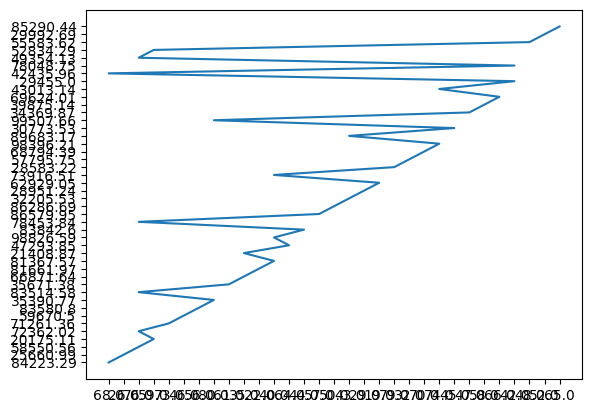

In [147]:
## Age vs. Salary Line plot
plt.plot(new_filtered_df['Age'],new_filtered_df['Salary'])

<BarContainer object of 44 artists>

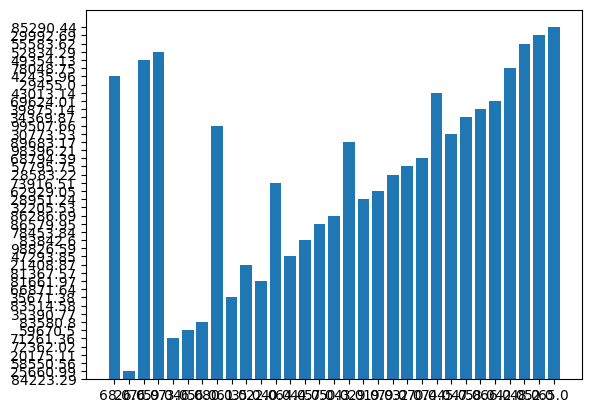

In [148]:
plt.bar(new_filtered_df['Age'],new_filtered_df['Salary'])

In [149]:
new_filtered_df.describe()


,Name,Age,Email,Country,Salary,DateOfJoining
count,44,44,44,44,44,44
unique,44,31,44,42,44,44
top,Kenneth Macdonald,76.0,ewolf@example.com,Greece,84223.29,2022-04-07
freq,1,5,1,2,1,1


In [150]:
new_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 3 to 98
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           44 non-null     object
 1   Age            44 non-null     object
 2   Email          44 non-null     object
 3   Country        44 non-null     object
 4   Salary         44 non-null     object
 5   DateOfJoining  44 non-null     object
dtypes: object(6)
memory usage: 2.4+ KB


In [152]:
original_df.describe()

,Name,Age,Email,Country,Salary,DateOfJoining
count,50,50,50,50,50,50
unique,49,34,50,48,49,50
top,invalid,76.0,ycastro@example.org,Netherlands Antilles,invalid,2022-09-29
freq,2,6,1,2,2,1


In [159]:
# filter the rows that contain the substring
substring = 'NAN'
filter = new_filtered_df['Salary'].str.contains(substring)
filter

3     False
5     False
7     False
9     False
10    False
13    False
20    False
23    False
24    False
28    False
29    False
35    False
36    False
37    False
44    False
49    False
51    False
52    False
58    False
59    False
60    False
64    False
68    False
69    False
70    False
72    False
73    False
74    False
78    False
80    False
81    False
82    False
83    False
84    False
85    False
86    False
87    False
89    False
91    False
92    False
93    False
94    False
96    False
98    False
Name: Salary, dtype: bool

In [160]:
new_filtered_df.describe()

,Name,Age,Email,Country,Salary,DateOfJoining
count,44,44,44,44,44,44
unique,44,31,44,42,44,44
top,Kenneth Macdonald,76.0,ewolf@example.com,Greece,84223.29,2022-04-07
freq,1,5,1,2,1,1


In [161]:
new_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 3 to 98
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           44 non-null     object
 1   Age            44 non-null     object
 2   Email          44 non-null     object
 3   Country        44 non-null     object
 4   Salary         44 non-null     object
 5   DateOfJoining  44 non-null     object
dtypes: object(6)
memory usage: 2.4+ KB


In [162]:
new_filtered_df['Age'] = new_filtered_df['Age'].astype(float)
new_filtered_df['Salary'] = new_filtered_df['Salary'].astype(float)

In [163]:
new_filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 3 to 98
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           44 non-null     object 
 1   Age            44 non-null     float64
 2   Email          44 non-null     object 
 3   Country        44 non-null     object 
 4   Salary         44 non-null     float64
 5   DateOfJoining  44 non-null     object 
dtypes: float64(2), object(4)
memory usage: 2.4+ KB


In [164]:
new_filtered_df.describe()

,Age,Salary
count,44.000000,44.000000
mean,54.795455,60092.459773
std,17.389625,24059.356035
min,19.000000,20175.110000
25%,42.000000,35601.227500
50%,56.500000,61299.775000
75%,70.750000,82125.122500
max,80.000000,99507.660000


(20000.0, 100000.0)

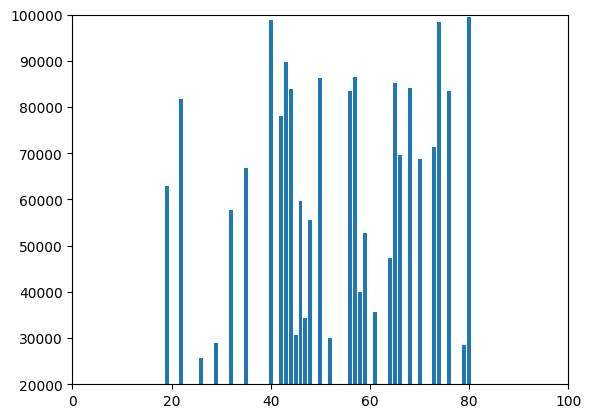

In [169]:
#setting y and x axis min and max limit
plt.bar(new_filtered_df["Age"],new_filtered_df['Salary'])
 
# Set the range of x-axis
plt.xlim(0, 100)
# Set the range of y-axis
plt.ylim(20000, 100000)